In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


plt.rcParams["figure.figsize"] = (10, 6) 
import warnings
warnings.filterwarnings('ignore') 

# Read Data

In [108]:
df = pd.read_csv("co2.csv")
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [109]:
df.shape

(7385, 12)

In [110]:
df.info

<bound method DataFrame.info of        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                       

In [111]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [112]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [113]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

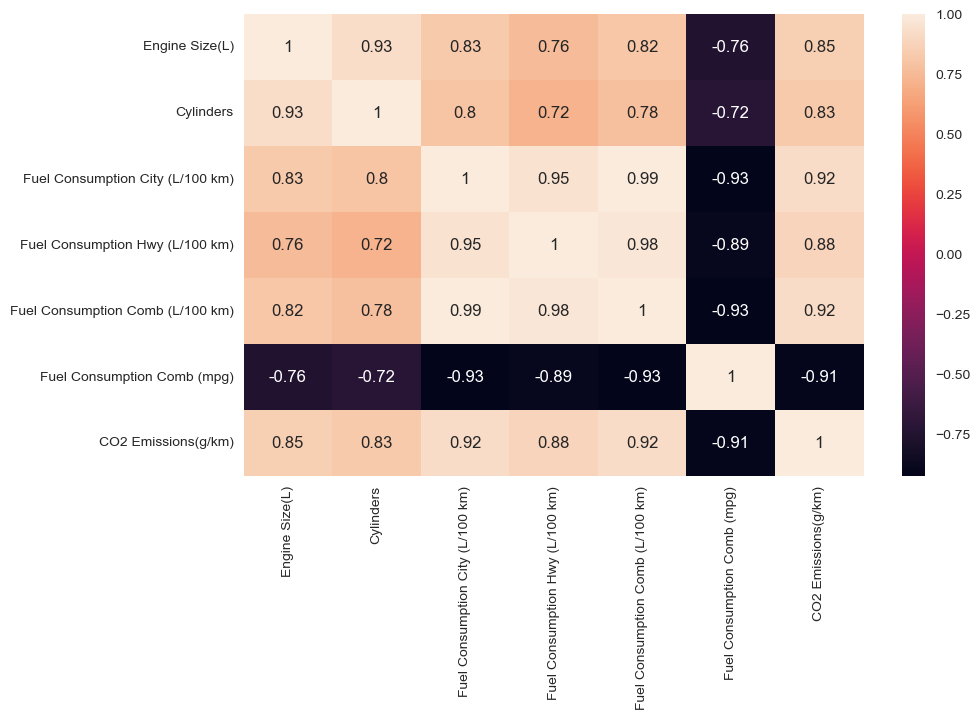

In [114]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [115]:
def color_red_val(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f' color:{color}'

In [116]:
pd.DataFrame(df).corr(numeric_only = True).style.applymap(color_red_val)

# Simple Linear Regression

In [117]:
df1 = df[["Engine Size(L)", "CO2 Emissions(g/km)"]]
df1.head()

Engine Size(L)  CO2 Emissions(g/km)
0             2.0                  196
1             2.4                  221
2             1.5                  136
3             3.5                  255
4             3.5                  244

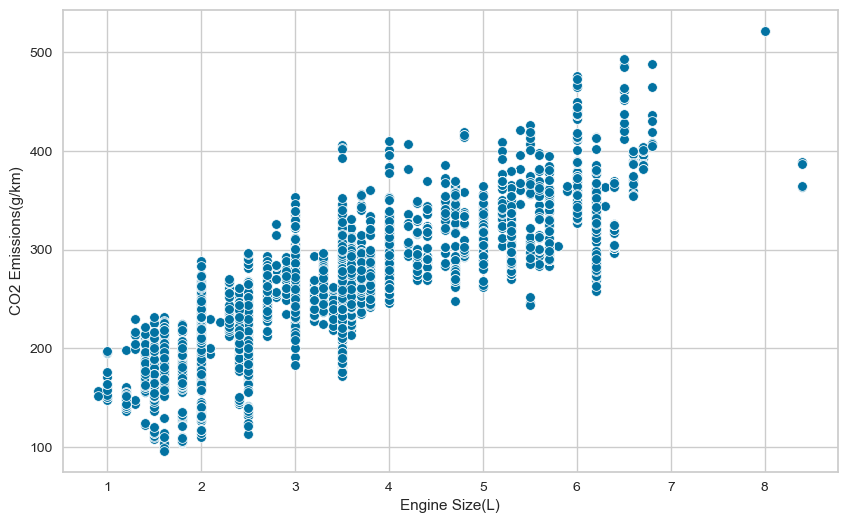

In [118]:
sns.scatterplot(data=df1, x="Engine Size(L)", y="CO2 Emissions(g/km)");

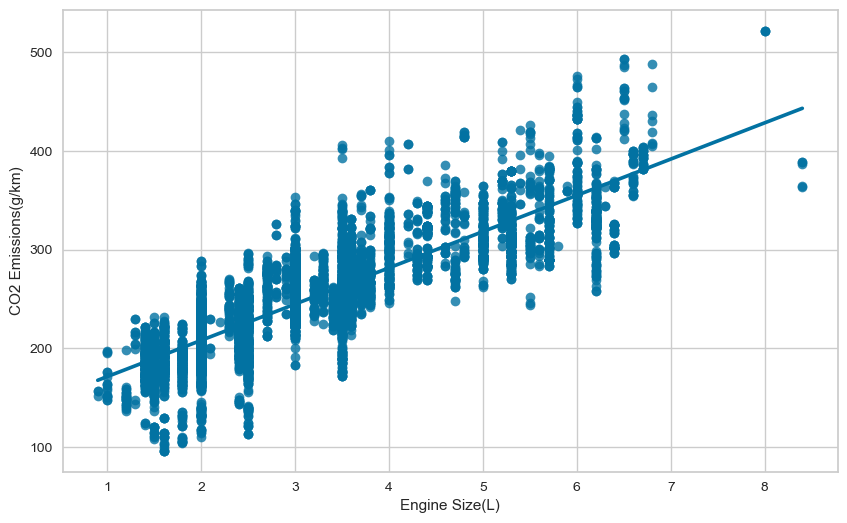

In [119]:
sns.regplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df1, ci=None);

In [120]:
X = df["Engine Size(L)"]
y = df["CO2 Emissions(g/km)"]

In [121]:
slope, intercept = np.polyfit(X, y, deg=1)

print("slope       :", slope)
print("intercept   :", intercept)

slope       : 36.77731518641939
intercept   : 134.3658927234949


In [122]:
b1, b0 = np.polyfit(X, y, deg=1)

print("b1 :", b1)
print("b0 :", b0)

b1 : 36.77731518641939
b0 : 134.3658927234949


In [123]:
corr = df["CO2 Emissions(g/km)"].corr(df["Engine Size(L)"])
corr

0.8511446437900009

In [124]:
R2_score = corr**2
R2_score

0.7244472046524075

In [125]:
np.polyfit(X, y, deg=1)

array([ 36.77731519, 134.36589272])

In [126]:
y_pred = b1*X + b0
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine Size(L), Length: 7385, dtype: float64

In [127]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

actual   predicted   residual          LSE
0        196  207.920523 -11.920523   142.098871
1        221  222.631449  -1.631449     2.661626
2        136  189.531866 -53.531866  2865.660624
3        255  263.086496  -8.086496    65.391416
4        244  263.086496 -19.086496   364.294325
...      ...         ...        ...          ...
7380     219  207.920523  11.079477   122.754808
7381     232  207.920523  24.079477   579.821208
7382     240  207.920523  32.079477  1029.092838
7383     232  207.920523  24.079477   579.821208
7384     248  207.920523  40.079477  1606.364469

[7385 rows x 4 columns]

In [128]:
df_2.residual.sum().round()

0.0

In [129]:
df_2.LSE.sum()

6966208.685372684

In [130]:
potential_engine = np.linspace(0,10,11)
potential_engine

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [131]:
predicted_co2_lin = b1*potential_engine + b0
predicted_co2_lin

array([134.36589272, 171.14320791, 207.9205231 , 244.69783828,
       281.47515347, 318.25246866, 355.02978384, 391.80709903,
       428.58441421, 465.3617294 , 502.13904459])

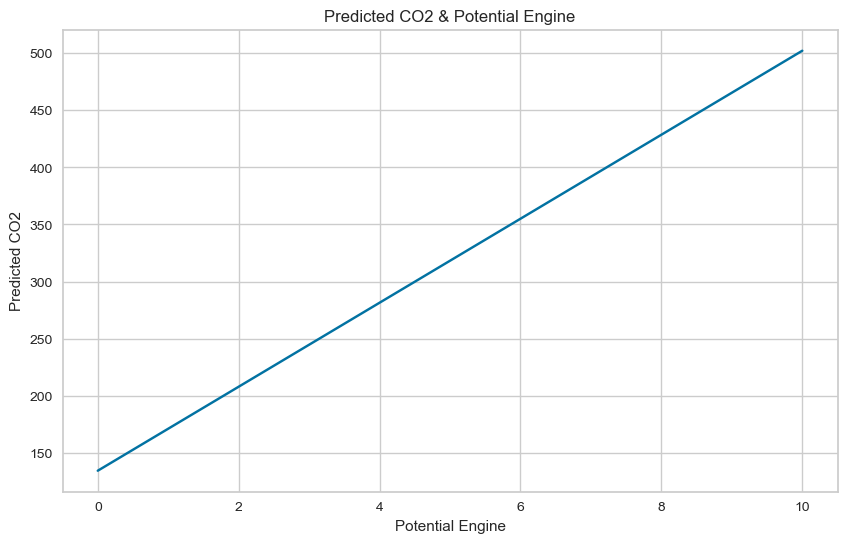

In [132]:
plt.plot(potential_engine, predicted_co2_lin)

plt.title("Predicted CO2 & Potential Engine")
plt.xlabel("Potential Engine")
plt.ylabel("Predicted CO2")
plt.show()

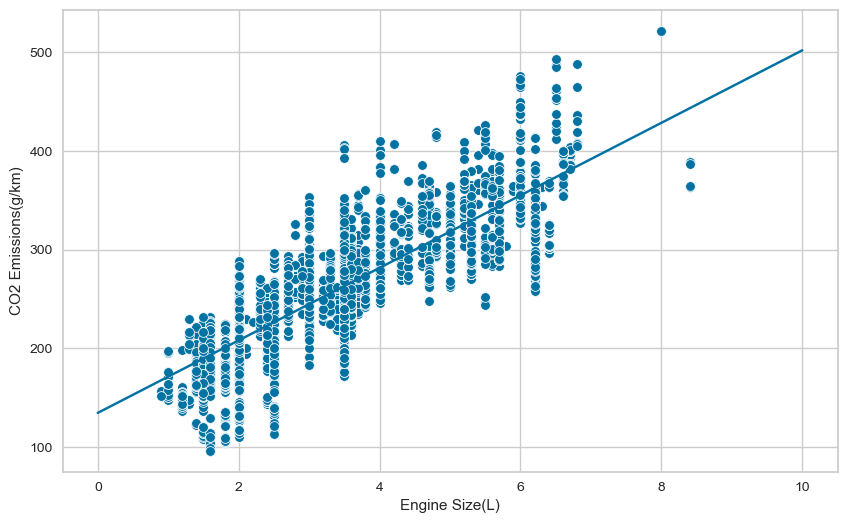

In [133]:
plt.plot(potential_engine, predicted_co2_lin)
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);

In [134]:
a = np.polyfit(X, y, deg=3)
a

array([ 0.5532652 , -8.69737899, 76.04439217, 84.89105185])

In [135]:
a1 = np.polyfit(X, y, deg=3)[0]
a2 = np.polyfit(X, y, deg=3)[1]
a3 = np.polyfit(X, y, deg=3)[2]
a0 = np.polyfit(X, y, deg=3)[3]

In [136]:
predicted_co2_poly = a1*potential_engine**3 + a2*potential_engine**2 + a3*potential_engine + a0
predicted_co2_poly 

array([ 84.89105185, 152.79133023, 206.61644184, 249.6859779 ,
       285.31952962, 316.8366882 , 347.55704486, 380.80019081,
       419.88571727, 468.13321543, 528.86227652])

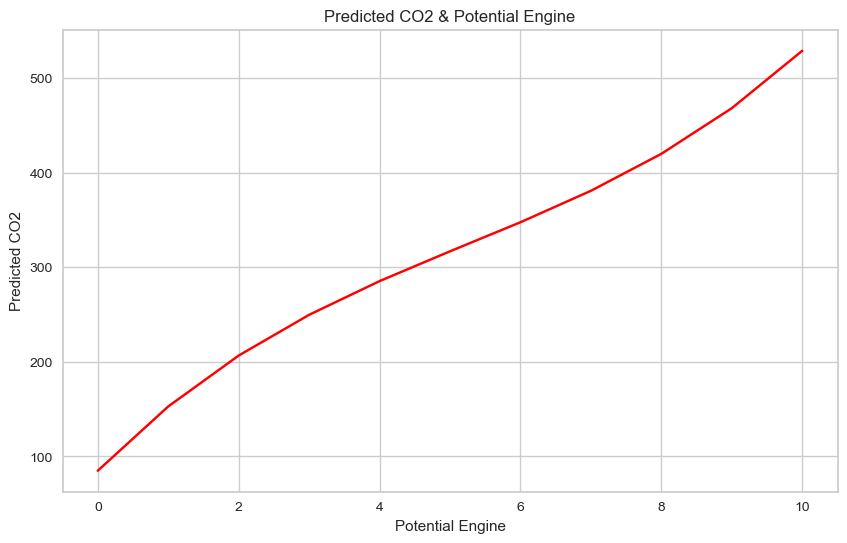

In [137]:
plt.plot(potential_engine, predicted_co2_poly, color="red")

plt.title("Predicted CO2 & Potential Engine")
plt.xlabel("Potential Engine")
plt.ylabel("Predicted CO2")
plt.show()

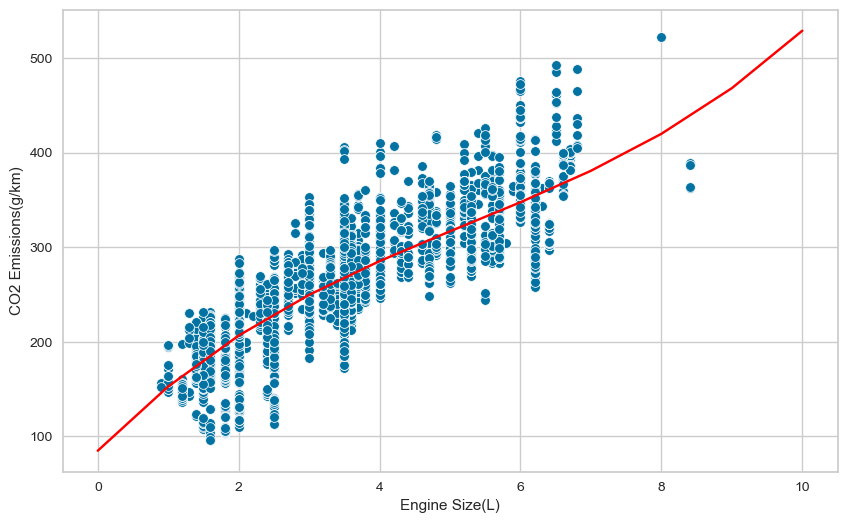

In [138]:
plt.plot(potential_engine, predicted_co2_poly, color="red")
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);

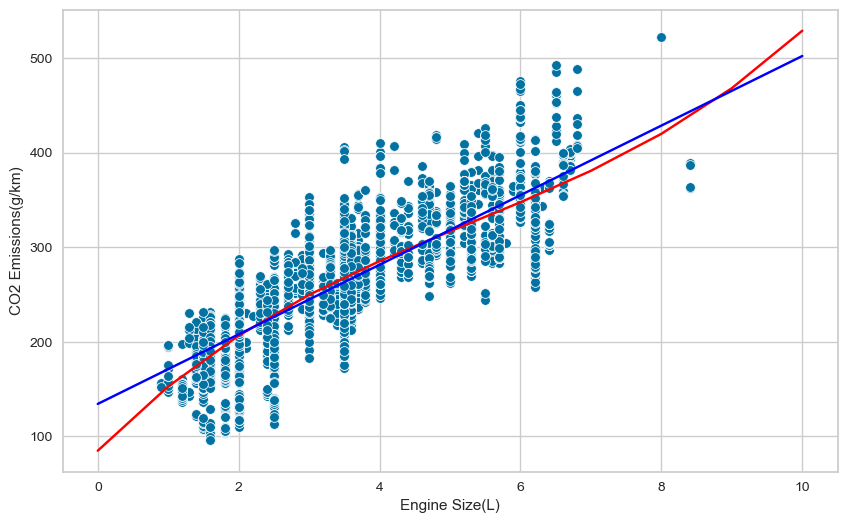

In [139]:
plt.plot(potential_engine, predicted_co2_poly, color="red")
plt.plot(potential_engine, predicted_co2_lin, color="blue")
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);

In [140]:
R2_score

0.7244472046524075

In [141]:
s = np.polyfit(X, y, deg=10)
s

array([-2.58821226e-03,  1.20187357e-01, -2.43202503e+00,  2.80824345e+01,
       -2.03684216e+02,  9.63599333e+02, -2.99207280e+03,  5.98239288e+03,
       -7.32608476e+03,  4.98209625e+03, -1.27036520e+03])

In [142]:
s1 = np.polyfit(X, y, deg=10)[0]
s2 = np.polyfit(X, y, deg=10)[1]
s3 = np.polyfit(X, y, deg=10)[2]
s4 = np.polyfit(X, y, deg=10)[3]
s5 = np.polyfit(X, y, deg=10)[4]
s6 = np.polyfit(X, y, deg=10)[5]
s7 = np.polyfit(X, y, deg=10)[6]
s8 = np.polyfit(X, y, deg=10)[7]
s9 = np.polyfit(X, y, deg=10)[8]
s10 = np.polyfit(X, y, deg=10)[9]
s0 = np.polyfit(X, y, deg=10)[10]

In [143]:
pred_lin = b1*X + b0
predicted_co2_poly = s1*X**10 + s2*X**9 + s3*X**8 + s4*X**7 + s5*X**6 + s6*X**5 + s7*X**4 + s8*X**3 + s9*X**2 + s10*X + s0
predicted_co2_poly 

0       205.694138
1       226.325002
2       181.493537
3       267.256741
4       267.256741
           ...    
7380    205.694138
7381    205.694138
7382    205.694138
7383    205.694138
7384    205.694138
Name: Engine Size(L), Length: 7385, dtype: float64

In [144]:
values = {"actual": y, "predicted": predicted_co2_poly, "residual": y - predicted_co2_poly, "LSE": (y - predicted_co2_poly)**2}
df_2 = pd.DataFrame(values)
df_2

actual   predicted   residual          LSE
0        196  205.694138  -9.694138    93.976309
1        221  226.325002  -5.325002    28.355647
2        136  181.493537 -45.493537  2069.661886
3        255  267.256741 -12.256741   150.227697
4        244  267.256741 -23.256741   540.875996
...      ...         ...        ...          ...
7380     219  205.694138  13.305862   177.045967
7381     232  205.694138  26.305862   691.998382
7382     240  205.694138  34.305862  1176.892176
7383     232  205.694138  26.305862   691.998382
7384     248  205.694138  42.305862  1789.785969

[7385 rows x 4 columns]

In [145]:
corr2 = df["CO2 Emissions(g/km)"].corr(predicted_co2_poly)
corr2

0.8581207649735595

In [146]:
R2_score2 = corr2**2
R2_score2

0.7363712472788069

# Multi Linear Regression

In [147]:
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [148]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

## Train|Test Split

In [149]:
X = df[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']]
y = df['CO2 Emissions(g/km)']

In [150]:
from sklearn.model_selection import train_test_split 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [152]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5169, 4)
y Train features shape: (5169,)
X Test features shape : (2216, 4)
Y Test features shape : (2216,)


## Model Fitting

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
lr = LinearRegression()

In [155]:
lr.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred =lr.predict(X_test)
y_pred

array([247.49314135, 318.24250605, 330.531149  , ..., 203.35582624,
       217.08713403, 322.16751909])

In [158]:
lr.coef_

array([12.63210709, 10.20241882,  0.44286467,  2.68240309])

In [159]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual": y_test - y_pred}

In [160]:
comparing = pd.DataFrame(my_dict)
comparing

Actual        Pred   Residual
7261     253  247.493141   5.506859
4489     344  318.242506  25.757494
1539     322  330.531149  -8.531149
3532     297  301.388352  -4.388352
6418     308  289.971685  18.028315
...      ...         ...        ...
5123     313  293.635087  19.364913
5359     193  205.449620 -12.449620
7294     200  203.355826  -3.355826
2569     224  217.087134   6.912866
1086     338  322.167519  15.832481

[2216 rows x 3 columns]

In [161]:
result_sample = comparing.sample(25)
result_sample

Actual        Pred   Residual
6263     261  259.045440   1.954560
4794     249  310.783343 -61.783343
3575     192  252.055130 -60.055130
977      177  188.386579 -11.386579
1235     258  252.655503   5.344497
6418     308  289.971685  18.028315
2492     250  253.706305  -3.706305
3580     242  248.419517  -6.419517
2417     167  175.829319  -8.829319
5718     248  312.179413 -64.179413
4602     324  315.869140   8.130860
5354     228  224.600575   3.399425
1867     359  342.161444  16.838556
5360     241  247.299747  -6.299747
7056     279  263.949553  15.050447
4508     341  315.566014  25.433986
1839     209  210.019670  -1.019670
7309     236  223.527023  12.472977
5284     324  301.004124  22.995876
4091     248  228.498763  19.501237
6667     209  206.950511   2.049489
5802     227  222.701729   4.298271
6952     201  196.779593   4.220407
573      232  228.892393   3.107607
3049     181  192.066102 -11.066102

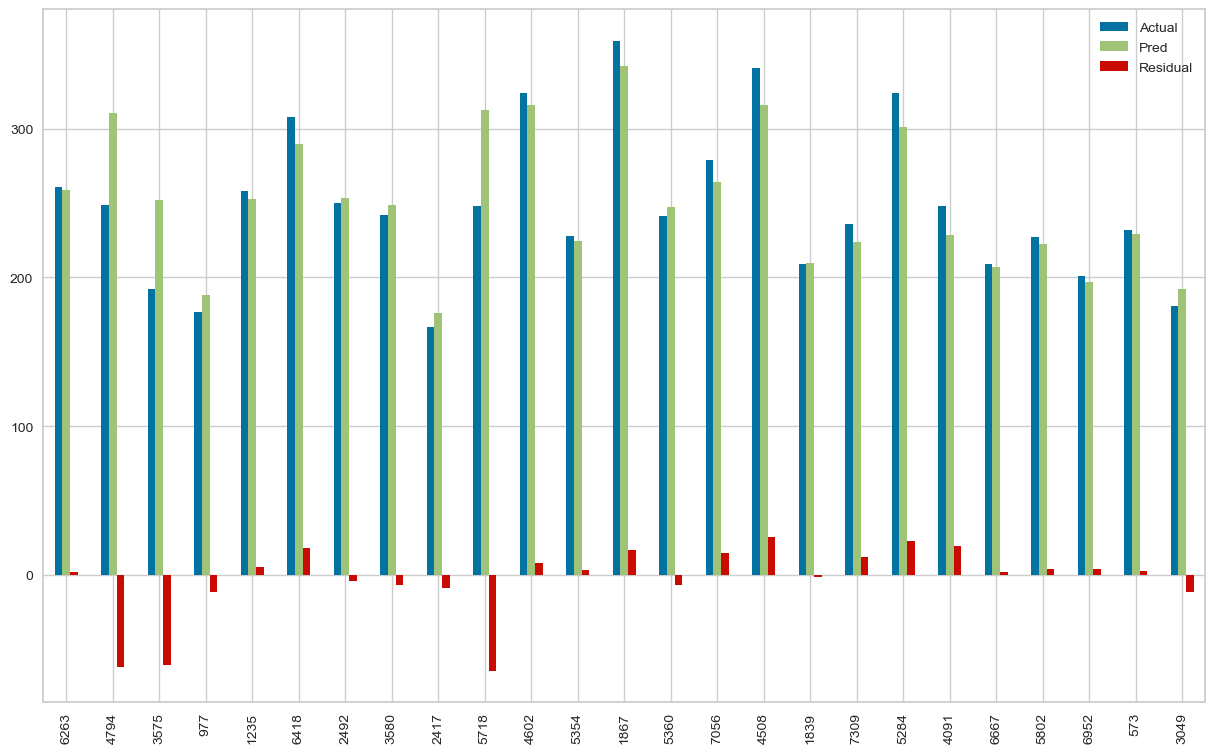

In [162]:
result_sample.plot(kind="bar", figsize=(15,9));

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [164]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [165]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8696343237869403
MAE 		: 13.480594300830539
MSE 		: 440.3368664459095
RMSE 		: 20.984205165931577


In [166]:
y_train_pred = lr.predict(X_train)

In [167]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8753401034629793
MAE 		: 13.398753941235908
MSE 		: 429.0443041489846
RMSE 		: 20.713384661831213


In [168]:
residuals = y_test - y_pred

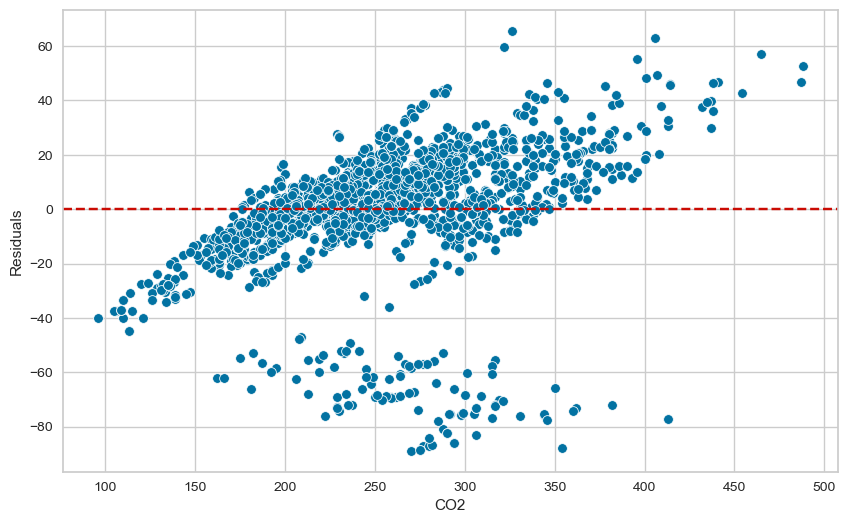

In [169]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_test, y=residuals)

plt.xlabel("CO2")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--");

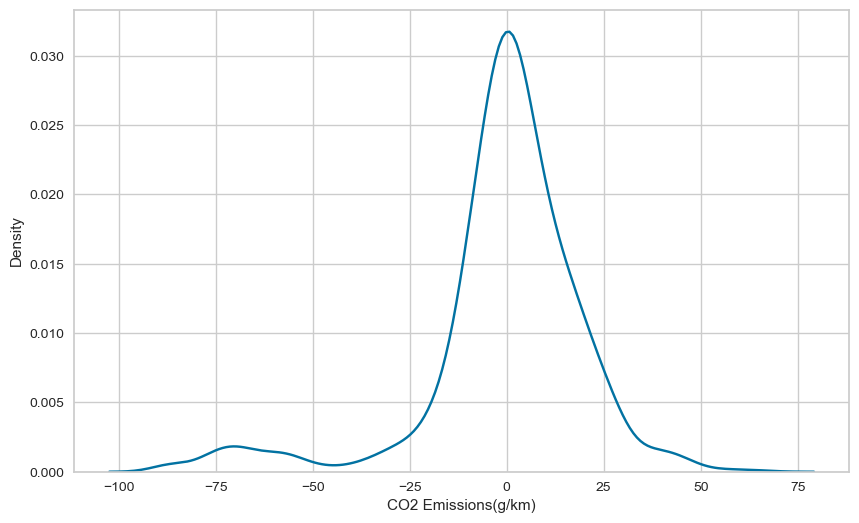

In [170]:
sns.kdeplot(residuals);

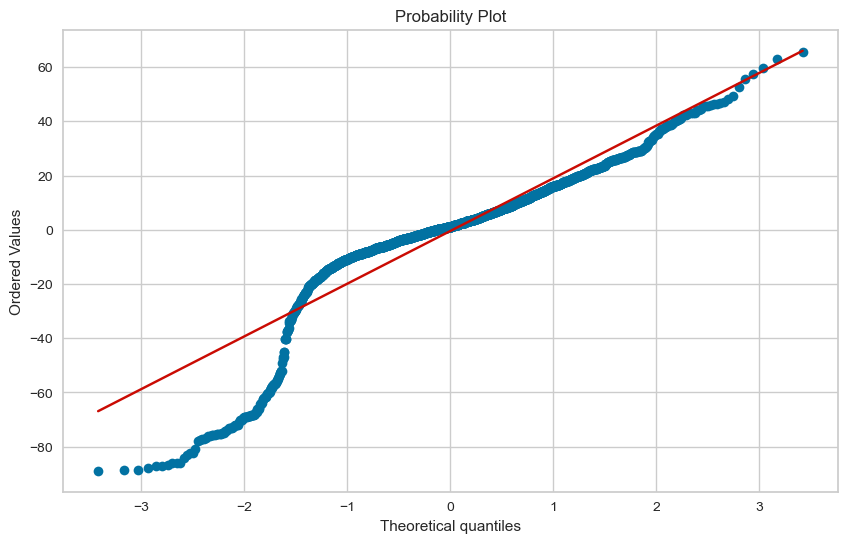

In [171]:
stats.probplot(residuals, dist="norm", plot=plt);

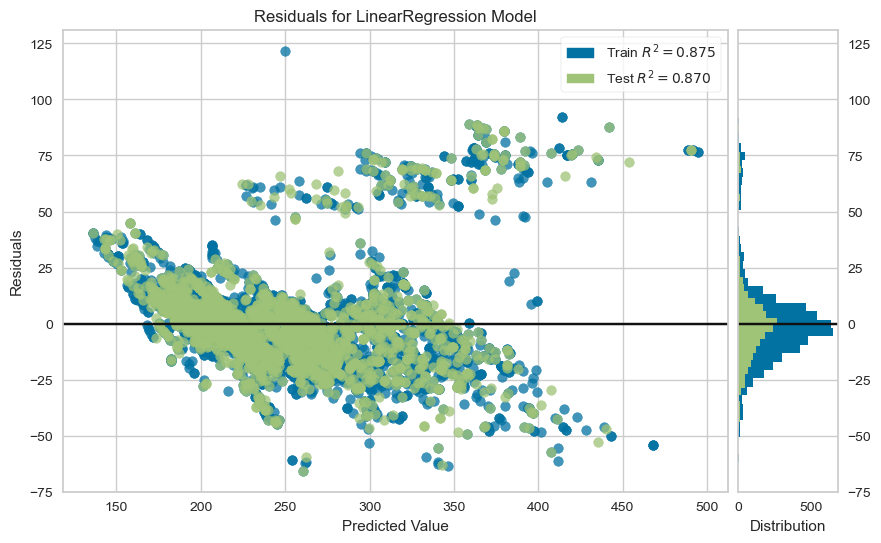

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [172]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()          

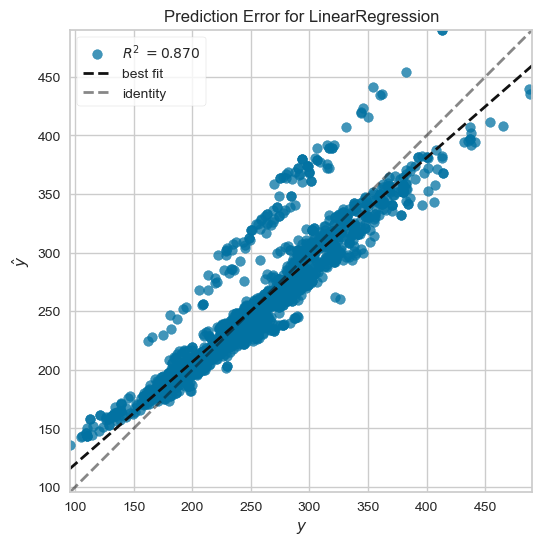

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [173]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

## Polynomial Conversion

In [174]:
from sklearn.preprocessing import PolynomialFeatures

In [175]:
polynomial_converter = PolynomialFeatures(degree=4, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [176]:
poly_features.shape

(7385, 69)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [178]:
from sklearn.linear_model import LinearRegression

model_poly = LinearRegression()

In [179]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [180]:
y_pred = model_poly.predict(X_test)

In [181]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

Actual        pred   residual
7261     253  256.794138  -3.794138
4489     344  319.325821  24.674179
1539     322  326.543037  -4.543037
3532     297  294.384018   2.615982
6418     308  310.955277  -2.955277
3703     406  338.311240  67.688760
5976     242  245.485945  -3.485945
4332     216  217.899681  -1.899681
5015     246  250.088839  -4.088839
2087     223  230.203698  -7.203698
2126     283  290.715208  -7.715208
4161     326  308.702401  17.297599
4814     274  274.863069  -0.863069
486      251  256.007992  -5.007992
6607     322  314.768019   7.231981
1128     382  399.338453 -17.338453
5159     248  251.768022  -3.768022
5391     193  194.371423  -1.371423
6643     204  199.850302   4.149698
6003     211  211.912713  -0.912713

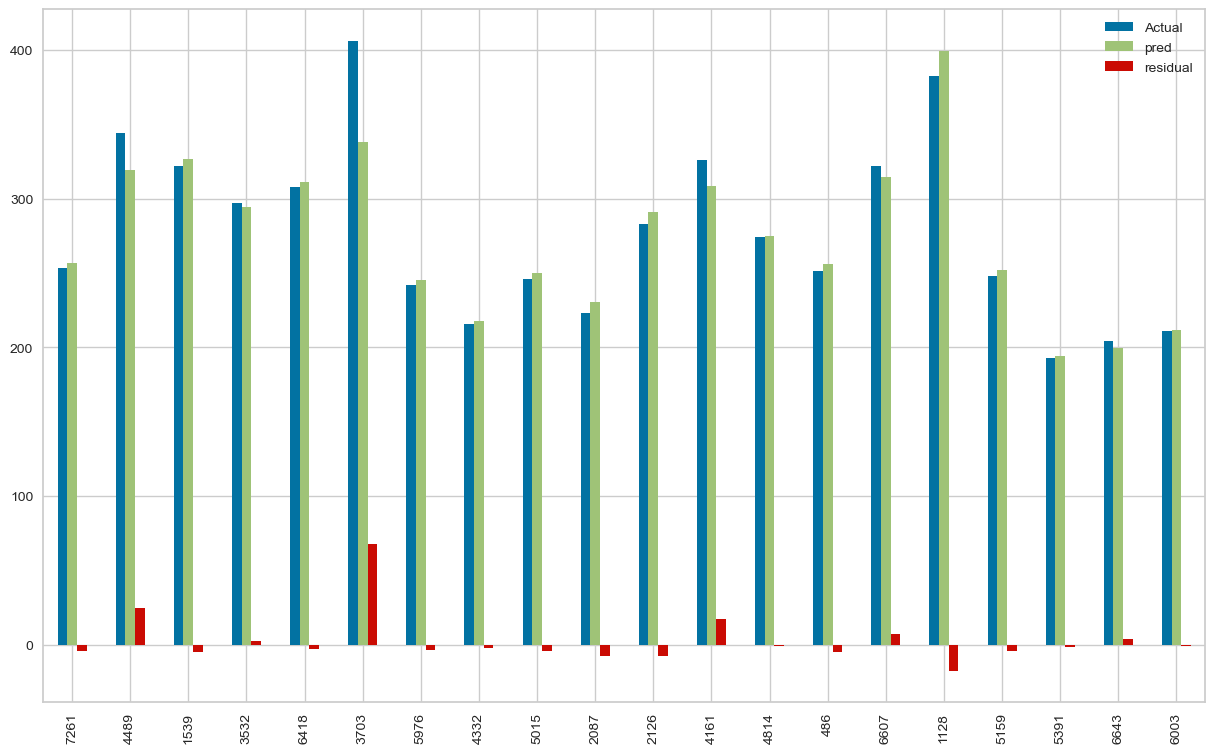

In [182]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

In [183]:
model_poly.coef_

array([-1.36481240e+01,  8.26971512e+02, -5.30438941e+02, -4.18118282e+02,
        2.50777656e+01, -3.92495966e+02,  1.90328578e+02,  1.93758938e+02,
        1.38932742e+03, -1.52167983e+03, -1.43536241e+03,  4.27847110e+02,
        7.92919718e+02,  3.71432280e+02,  1.11123173e+01, -1.51042532e+02,
        6.62532802e+01,  7.05976101e+01,  1.56946958e+03, -1.44105352e+03,
       -1.56090503e+03,  3.38402626e+02,  7.05167756e+02,  3.93755041e+02,
        7.00767829e+03, -1.03841886e+04, -1.13351671e+04,  5.04998673e+03,
        1.13245247e+04,  6.04179164e+03, -8.06954433e+02, -2.78790749e+03,
       -3.04870170e+03, -1.06309073e+03,  7.56120616e-01,  3.01962099e+00,
       -1.81377428e+00, -2.92344599e+00, -1.40202975e+02,  1.42398304e+02,
        1.50938657e+02, -3.58683011e+01, -7.61362458e+01, -3.98960621e+01,
        1.13359226e+03, -1.52660658e+03, -1.90238012e+03,  7.08303986e+02,
        1.66860014e+03,  1.07253921e+03, -1.13605588e+02, -3.77268634e+02,
       -4.60218283e+02, -

In [184]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [185]:
y_pred = model_poly.predict(X_test)

In [186]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [187]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.935616415112532
MAE 		: 7.435432121956728
MSE 		: 217.46879119905793
RMSE 		: 14.746823088348824


In [188]:
y_train_pred = model_poly.predict(X_train)   

In [189]:
 eval_metric(y_train, y_train_pred)   

Model testing performance:
--------------------------
R2_score 	: 0.9442114196252278
MAE 		: 6.897776990133882
MSE 		: 192.0086034986043
RMSE 		: 13.856716909087963


In [190]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [192]:
poly(10)

train_rmse_errors  test_rmse_errors  number of features
1          20.855262         20.665769                   4
2          16.661711         16.560362                  14
3          15.820798         15.626022                  34
4          14.199758         14.116195                  69
5          13.517679         15.302309                 125
6          12.263201         27.984051                 209
7          11.062162        130.102235                 329
8          10.960245        105.223450                 494
9          15.814086        431.630347                 714

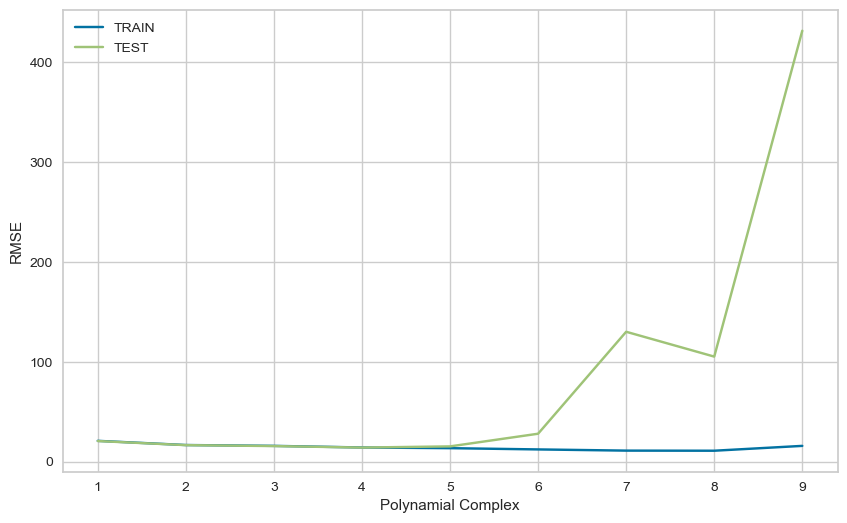

In [193]:
# Patlama noktası

plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

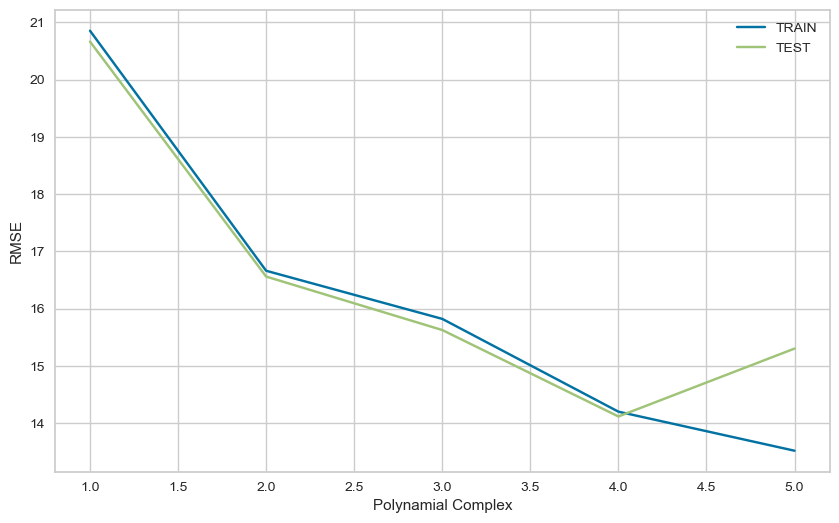

In [194]:
# grafige daha yaakından bakalım

plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

## Scale

In [195]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [196]:
scaler = StandardScaler()

In [197]:
scaler.fit(X_train)

StandardScaler()

In [198]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.71235412, -0.89706537, -0.52119825, ..., -0.53105059,
        -0.55890106, -0.57332773],
       [-0.12513485,  0.2083558 ,  0.47101105, ..., -0.10280261,
        -0.17113119, -0.23000964],
       [-0.12513485, -0.55162125, -0.47609783, ..., -0.44742492,
        -0.45736725, -0.46288038],
       ...,
       [ 0.2418772 , -0.20617714, -0.11529444, ..., -0.32055742,
        -0.34026066, -0.3565452 ],
       [-0.49214689, -0.82797655, -0.74670036, ..., -0.53110291,
        -0.53901631, -0.5407905 ],
       [ 0.60888924,  0.31198903,  0.47101105, ..., -0.03345799,
        -0.0784685 , -0.12170524]])

In [199]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12513485, -0.03345508, -0.0250936 , ..., -0.25158207,
        -0.26164133, -0.27126864],
       [ 0.90249888,  1.27923255,  1.14751739, ...,  0.7834548 ,
         0.83867019,  0.87541316],
       [ 2.22374224,  1.03742167,  1.05731654, ...,  0.53842313,
         0.51843695,  0.48610353],
       ...,
       [-0.85915894, -0.82797655, -0.83690121, ..., -0.53350147,
        -0.53320286, -0.52847945],
       [-0.85915894, -0.48253243, -0.52119825, ..., -0.43909443,
        -0.43934753, -0.43694842],
       [ 1.12270611,  1.27923255,  1.01221612, ...,  0.72343756,
         0.82500421,  0.91174658]])

In [200]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9   ...   59   60   61  \
mean  0.0  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  ...  0.0  0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       62   63   64   65   66   67   68  
mean -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 69 columns]

In [201]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9   ...   59   60   61  \
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ... -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       62   63   64   65   66   67   68  
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 69 columns]

In [202]:
from sklearn.linear_model import LinearRegression

In [204]:
lr = LinearRegression()

In [205]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [206]:
y_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

In [208]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [209]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

linear_train  linear_test
R2        0.944211     0.935616
mae       6.897777     7.435432
mse     192.008604   217.468791
rmse     13.856717    14.746823

## Cross Validation (CV)

In [210]:
from sklearn.model_selection import cross_validate, cross_val_score

In [211]:
import sklearn.metrics
for i in dir(sklearn.metrics):
    print(i)

ConfusionMatrixDisplay
DetCurveDisplay
DistanceMetric
PrecisionRecallDisplay
PredictionErrorDisplay
RocCurveDisplay
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_base
_classification
_dist_metrics
_pairwise_distances_reduction
_pairwise_fast
_plot
_ranking
_regression
_scorer
accuracy_score
adjusted_mutual_info_score
adjusted_rand_score
auc
average_precision_score
balanced_accuracy_score
brier_score_loss
calinski_harabasz_score
check_scoring
class_likelihood_ratios
classification_report
cluster
cohen_kappa_score
completeness_score
confusion_matrix
consensus_score
coverage_error
d2_absolute_error_score
d2_pinball_score
d2_tweedie_score
davies_bouldin_score
dcg_score
det_curve
euclidean_distances
explained_variance_score
f1_score
fbeta_score
fowlkes_mallows_score
get_scorer
get_scorer_names
hamming_loss
hinge_loss
homogeneity_completeness_v_measure
homogeneity_score
jaccard_score
label_ranking_average_precision_score
label_ranking_los

In [212]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [213]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df

cv_fit_time  cv_score_time  cv_test_r2  cv_test_neg_mean_absolute_error  \
1     0.059415       0.006176    0.940801                        -7.075743   
2     0.012562       0.001518    0.948829                        -6.550456   
3     0.009899       0.003584    0.914177                        -7.978223   
4     0.009010       0.000000    0.956569                        -6.653995   
5     0.016186       0.003514    0.934315                        -7.457651   

   cv_test_neg_mean_squared_error  cv_test_neg_root_mean_squared_error  
1                     -205.084310                           -14.320765  
2                     -166.130553                           -12.889164  
3                     -285.093782                           -16.884720  
4                     -155.471088                           -12.468805  
5                     -235.197148                           -15.336139

In [215]:
# Before

train_val(y_train, y_train_pred, y_test, y_pred, "linear")

linear_train  linear_test
R2        0.944211     0.935616
mae       6.897777     7.435432
mse     192.008604   217.468791
rmse     13.856717    14.746823

In [216]:
# After

cv_df.iloc[:, 2:].mean()

cv_test_r2                               0.938938
cv_test_neg_mean_absolute_error         -7.143214
cv_test_neg_mean_squared_error        -209.395376
cv_test_neg_root_mean_squared_error    -14.379919
dtype: float64

In [262]:
lr_df = pd.DataFrame(lr.coef_, columns = ["lr_coef"])
lr_df

lr_coef
0  -1.859356e+01
1   2.393937e+03
2  -1.176129e+03
3  -1.468246e+03
4   2.595150e+02
..           ...
64  6.940801e+05
65  1.267393e+06
66 -3.625542e+06
67 -7.970261e+06
68 -2.663217e+06

[69 rows x 1 columns]

## Regularization

### Ridge Regression

In [224]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [225]:
ridge_cv_model = RidgeCV()

In [236]:
alpha_space = np.linspace(0.1, 2, 500)

In [237]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv=5, scoring="neg_root_mean_squared_error")

In [238]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.1       , 0.10380762, 0.10761523, 0.11142285, 0.11523046,
       0.11903808, 0.12284569, 0.12665331, 0.13046092, 0.13426854,
       0.13807615, 0.14188377, 0.14569138, 0.149499  , 0.15330661,
       0.15711423, 0.16092184, 0.16472946, 0.16853707, 0.17234469,
       0.1761523 , 0.17995992, 0.18376754, 0.18757515, 0.19138277,
       0.19519038, 0.198998  , 0.20280561, 0.20661323, 0.21042084,
       0.21422846...
       1.88957916, 1.89338677, 1.89719439, 1.901002  , 1.90480962,
       1.90861723, 1.91242485, 1.91623246, 1.92004008, 1.9238477 ,
       1.92765531, 1.93146293, 1.93527054, 1.93907816, 1.94288577,
       1.94669339, 1.950501  , 1.95430862, 1.95811623, 1.96192385,
       1.96573146, 1.96953908, 1.97334669, 1.97715431, 1.98096192,
       1.98476954, 1.98857715, 1.99238477, 1.99619238, 2.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [239]:
ridge_cv_model.alpha_

0.1

In [240]:
ridge_cv_model.best_score_

-14.788577239344002

In [246]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

ridge_cv_train  ridge_cv_test
R2          0.937532       0.929979
mae         7.640661       8.038174
mse       214.997957     236.508819
rmse       14.662809      15.378843

In [247]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [248]:
ridge_cv_model.coef_

array([  -3.64081497,  -10.41277986,  -64.53578932,  -23.34544724,
        -90.27323042,   36.2288982 ,   22.70902005,   24.27413367,
        131.08162282,  130.28649796,   96.93492773,   72.5589865 ,
        138.01712046,   43.41917536,   31.06293708,   -1.56958157,
        -44.19395866,   20.13531589,   28.11465137,   19.1308764 ,
         25.36952911,   -5.38266767,   31.76380692,   14.80812351,
        -77.84550005,  -78.95714126,  -92.69144855,  -71.69361431,
        -90.49540527, -108.53299189,  -70.47956647,  -71.52125808,
       -107.82422894, -122.74534163,   -8.37895831,  -25.53469936,
        -15.31985429,  -21.51372   ,   21.71306677,   47.86756303,
         17.12292892,   66.06785901,   52.94604458,    6.624962  ,
        -35.19610977,  -44.86596605,  -22.48650955,  -35.51519222,
        -36.28097765,   -8.18937659,  -13.56553064,  -27.55366397,
        -27.97887048,    8.65576919,    7.46641617,  -22.65525223,
         25.99099747,   -4.47134429,  -24.47349704,   55.34744

In [260]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_model.coef"])

In [253]:
pd.concat([ls, rcs], axis=1)

linear_train  linear_test  ridge_cv_train  ridge_cv_test
R2        0.944211     0.935616        0.937532       0.929979
mae       6.897777     7.435432        7.640661       8.038174
mse     192.008604   217.468791      214.997957     236.508819
rmse     13.856717    14.746823       14.662809      15.378843

In [264]:
pd.concat([lr_df, rcm_df], axis=1)

lr_coef  ridge_cv_model.coef
0  -1.859356e+01            -3.640815
1   2.393937e+03           -10.412780
2  -1.176129e+03           -64.535789
3  -1.468246e+03           -23.345447
4   2.595150e+02           -90.273230
..           ...                  ...
64  6.940801e+05           138.669427
65  1.267393e+06            26.101699
66 -3.625542e+06           -34.463020
67 -7.970261e+06            -0.792022
68 -2.663217e+06           150.677049

[69 rows x 2 columns]

### LASSO

In [266]:
from sklearn.linear_model import Lasso, LassoCV

In [267]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=5, max_iter=10000, random_state=42)

In [268]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.1       , 0.10380762, 0.10761523, 0.11142285, 0.11523046,
       0.11903808, 0.12284569, 0.12665331, 0.13046092, 0.13426854,
       0.13807615, 0.14188377, 0.14569138, 0.149499  , 0.15330661,
       0.15711423, 0.16092184, 0.16472946, 0.16853707, 0.17234469,
       0.1761523 , 0.17995992, 0.18376754, 0.18757515, 0.19138277,
       0.19519038, 0.198998  , 0.20280561, 0.20661323, 0.21042084,
       0.21422846...
       1.88957916, 1.89338677, 1.89719439, 1.901002  , 1.90480962,
       1.90861723, 1.91242485, 1.91623246, 1.92004008, 1.9238477 ,
       1.92765531, 1.93146293, 1.93527054, 1.93907816, 1.94288577,
       1.94669339, 1.950501  , 1.95430862, 1.95811623, 1.96192385,
       1.96573146, 1.96953908, 1.97334669, 1.97715431, 1.98096192,
       1.98476954, 1.98857715, 1.99238477, 1.99619238, 2.        ]),
        cv=5, max_iter=10000, random_state=42)

In [269]:
print(lasso_cv_model.n_iter_)

10000


In [270]:
lasso_cv_model.alpha_

0.1

In [271]:
best_alpha = lasso_cv_model.alpha_

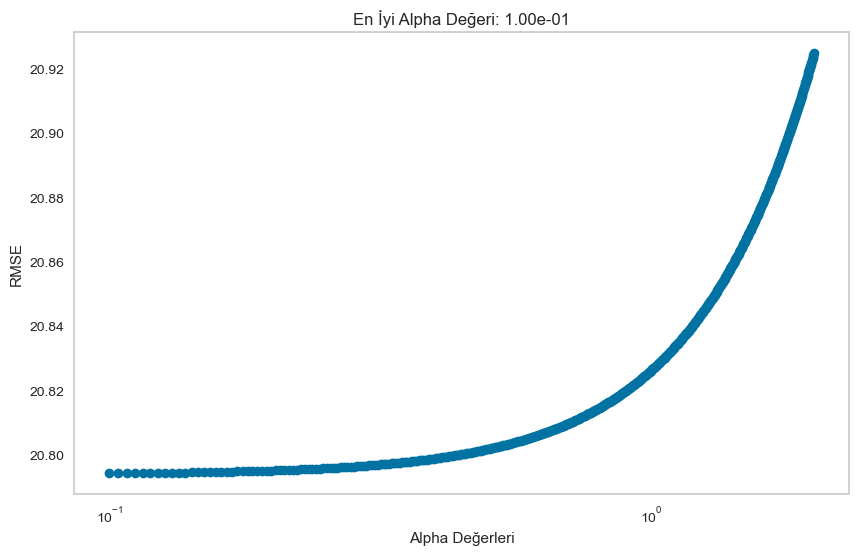

In [272]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)

# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

In [273]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [274]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

lasso_cv_train  lasso_cv_test
R2          0.922665       0.916410
mae         8.739385       9.047634
mse       266.163706     282.343618
rmse       16.314524      16.803084

In [275]:
pd.concat([ls, rcs, lcs], axis=1)

linear_train  linear_test  ridge_cv_train  ridge_cv_test  \
R2        0.944211     0.935616        0.937532       0.929979   
mae       6.897777     7.435432        7.640661       8.038174   
mse     192.008604   217.468791      214.997957     236.508819   
rmse     13.856717    14.746823       14.662809      15.378843   

      lasso_cv_train  lasso_cv_test  
R2          0.922665       0.916410  
mae         8.739385       9.047634  
mse       266.163706     282.343618  
rmse       16.314524      16.803084

In [276]:
lasso_cv_model.coef_

array([  1.07176906,  66.72820829,  14.52397051,  13.2322331 ,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        , -34.25027323,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
       -63.97074602,  -0.        ,  -6.30342243,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.43432733,   0.        ,   0.43332611,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  11.84259094,   0.        ,
         0.        ,  50.23121036,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [277]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns=["lasso_cv_coef"])

In [279]:
pd.concat([lr_df, rcm_df, lcm_df], axis=1)

lr_coef  ridge_cv_model.coef  lasso_cv_coef
0  -1.859356e+01            -3.640815       1.071769
1   2.393937e+03           -10.412780      66.728208
2  -1.176129e+03           -64.535789      14.523971
3  -1.468246e+03           -23.345447      13.232233
4   2.595150e+02           -90.273230      -0.000000
..           ...                  ...            ...
64  6.940801e+05           138.669427       0.000000
65  1.267393e+06            26.101699       0.000000
66 -3.625542e+06           -34.463020      -0.000000
67 -7.970261e+06            -0.792022       0.000000
68 -2.663217e+06           150.677049       0.000000

[69 rows x 3 columns]

## ElasticNet

In [280]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [281]:
elastic_cv_model = ElasticNetCV(alphas=alpha_space,
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                cv=5,
                                max_iter=100000,
                                random_state=42)

In [282]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.1       , 0.10380762, 0.10761523, 0.11142285, 0.11523046,
       0.11903808, 0.12284569, 0.12665331, 0.13046092, 0.13426854,
       0.13807615, 0.14188377, 0.14569138, 0.149499  , 0.15330661,
       0.15711423, 0.16092184, 0.16472946, 0.16853707, 0.17234469,
       0.1761523 , 0.17995992, 0.18376754, 0.18757515, 0.19138277,
       0.19519038, 0.198998  , 0.20280561, 0.20661323, 0.21042084,
       0.214...
       1.88957916, 1.89338677, 1.89719439, 1.901002  , 1.90480962,
       1.90861723, 1.91242485, 1.91623246, 1.92004008, 1.9238477 ,
       1.92765531, 1.93146293, 1.93527054, 1.93907816, 1.94288577,
       1.94669339, 1.950501  , 1.95430862, 1.95811623, 1.96192385,
       1.96573146, 1.96953908, 1.97334669, 1.97715431, 1.98096192,
       1.98476954, 1.98857715, 1.99238477, 1.99619238, 2.        ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [296]:
print(elastic_cv_model.n_iter_)

14071


In [283]:
elastic_cv_model.alpha_

0.1

In [284]:
elastic_cv_model.l1_ratio_

1.0

In [285]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [286]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

elastic_cv_train  elastic_cv_test
R2            0.922681         0.916380
mae           8.729477         9.041726
mse         266.110467       282.444503
rmse         16.312893        16.806085

In [287]:
pd.concat([ls, rcs, lcs, ecs], axis = 1)

linear_train  linear_test  ridge_cv_train  ridge_cv_test  \
R2        0.944211     0.935616        0.937532       0.929979   
mae       6.897777     7.435432        7.640661       8.038174   
mse     192.008604   217.468791      214.997957     236.508819   
rmse     13.856717    14.746823       14.662809      15.378843   

      lasso_cv_train  lasso_cv_test  elastic_cv_train  elastic_cv_test  
R2          0.922665       0.916410          0.922681         0.916380  
mae         8.739385       9.047634          8.729477         9.041726  
mse       266.163706     282.343618        266.110467       282.444503  
rmse       16.314524      16.803084         16.312893        16.806085

In [288]:
elastic_cv_model.coef_

array([  0.97977419,  54.28945122,  19.17114129,  21.15585072,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        , -16.69813829,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
       -81.16417399,  -0.        ,  -6.20924277,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.81548775,   0.        ,   0.1527222 ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  12.953503  ,   0.        ,
         0.        ,  48.65270578,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [294]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef"])

In [295]:
pd.concat([lr_df, rcm_df, lcm_df, ecm_df], axis = 1)

lr_coef  ridge_cv_model.coef  lasso_cv_coef  elastic_coef
0  -1.859356e+01            -3.640815       1.071769      0.979774
1   2.393937e+03           -10.412780      66.728208     54.289451
2  -1.176129e+03           -64.535789      14.523971     19.171141
3  -1.468246e+03           -23.345447      13.232233     21.155851
4   2.595150e+02           -90.273230      -0.000000     -0.000000
..           ...                  ...            ...           ...
64  6.940801e+05           138.669427       0.000000      0.000000
65  1.267393e+06            26.101699       0.000000      0.000000
66 -3.625542e+06           -34.463020      -0.000000     -0.000000
67 -7.970261e+06            -0.792022       0.000000      0.000000
68 -2.663217e+06           150.677049       0.000000      0.000000

[69 rows x 4 columns]

## GridSearch

In [297]:
from sklearn.model_selection import GridSearchCV

In [298]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [299]:
param_grid = {"alpha":[0.01, 00.12, 0.2, 0.5, 0.6, 0.7, 1],
              "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [302]:
grid_model = GridSearchCV(estimator = elastic_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 5,
                          verbose = 2,
                          n_jobs = -1) # verbose altta çıkan raporu verir.

In [303]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.01, 0.12, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [304]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [305]:
grid_model.best_index_

6

In [306]:
pd.DataFrame(grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        6.346845      0.892302         0.000957        0.001569        0.01   
1        6.052536      1.522122         0.003337        0.002909        0.01   
2        5.872690      1.319151         0.000709        0.001417        0.01   
3        4.467000      0.395059         0.001302        0.002604        0.01   
4        5.249652      0.684295         0.000761        0.000668        0.01   
5        4.392515      0.742371         0.002780        0.002741        0.01   
6        5.110694      1.303607         0.004724        0.003098        0.01   
7        3.101121      0.390946         0.001018        0.001268        0.12   
8        2.905243      0.213441         0.002404        0.002434        0.12   
9        1.834395      0.169461         0.001515        0.002018        0.12   
10       2.049401      0.333334         0.000516        0.001033        0.12   
11       1.369881      0.348385         0.000707        0.001413        0.12   
12       3.431438      0.643164         0.001108        0.002215        0.12   
13       3.299908      0.316944         0.002508        0.003170        0.12   
14       1.533532      0.203761         0.000308        0.000615         0.2   
15       1.454137      0.231003         0.001592        0.003184         0.2   
16       1.103989      0.189958         0.002620        0.004290         0.2   
17       1.087967      0.160089         0.000000        0.000000         0.2   
18       1.446946      0.133598         0.000308        0.000615         0.2   
19       1.586831      0.305907         0.002121        0.003523         0.2   
20       1.531425      0.427010         0.002218        0.001329         0.2   
21       0.855975      0.108967         0.000241        0.000481         0.5   
22       0.335260      0.054897         0.001864        0.002047         0.5   
23       0.434770      0.068437         0.002122        0.001542         0.5   
24       0.233545      0.057619         0.001607        0.001995         0.5   
25       0.262389      0.056959         0.002545        0.002277         0.5   
26       0.327562      0.042242         0.000665        0.001330         0.5   
27       0.655475      0.122323         0.000000        0.000000         0.5   
28       0.648986      0.101066         0.003709        0.003549         0.6   
29       0.274335      0.040754         0.000000        0.000000         0.6   
30       0.335849      0.033198         0.001459        0.002918         0.6   
31       0.175359      0.033949         0.000566        0.000798         0.6   
32       0.162722      0.022075         0.000555        0.000684         0.6   
33       0.276785      0.084432         0.001823        0.001700         0.6   
34       0.568973      0.092929         0.002048        0.002557         0.6   
35       0.518251      0.049334         0.000187        0.000236         0.7   
36       0.238823      0.019639         0.000702        0.001404         0.7   
37       0.329074      0.045809         0.001441        0.001746         0.7   
38       0.235703      0.040966         0.001114        0.001974         0.7   
39       0.139912      0.037616         0.002160        0.003688         0.7   
40       0.249390      0.088799         0.000905        0.001810         0.7   
41       0.456057      0.070486         0.002423        0.002988         0.7   
42       0.358060      0.035332         0.000524        0.000641           1   
43       0.184738      0.024332         0.000607        0.001214           1   
44       0.225895      0.020236         0.003342        0.003387           1   
45       0.208753      0.022273         0.002612        0.003340           1   
46       0.144724      0.035186         0.000345        0.000603           1   
47       0.131473      0.019679         0.000000        0.000000           1   
48       0.176747      0.035537         0.000109        0.000218           1   

   

In [307]:
grid_model.best_score_

-15.336693767053205